# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [93]:
import matplotlib.pyplot as plt
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [94]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "./km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',') # creates ITERABLE object (see later)
#print(lines)
# place your loading code here
km=[]
year=[]
powerPS=[]
avgPrice=[]

In [95]:
 for line in lines:
    #print(line)
    #np.append(car_data, line)
    km.append(line[0])
    year.append(line[1])
    powerPS.append(line[2])
    avgPrice.append(line[3])

py_car_data=[km, year, powerPS, avgPrice]
x_labels = ['Distance covered', 'Year of production', 'Engine power']

for feature in py_car_data:
    feature.pop(0)
#print(car_data)

car_data=np.asarray(py_car_data).astype(float) # ---> otherwise elements are strings
print(car_data, type(car_data), np.shape(car_data))  

[[1.250000e+05 1.500000e+05 5.000000e+03 ... 2.000000e+04 1.000000e+04
  2.000000e+04]
 [2.001000e+03 2.001000e+03 2.001000e+03 ... 2.015000e+03 2.015000e+03
  2.015000e+03]
 [4.000000e+01 4.000000e+01 6.000000e+01 ... 2.600000e+02 3.000000e+02
  3.000000e+02]
 [1.371110e+03 1.298700e+03 1.232430e+03 ... 4.949238e+04 3.854269e+04
  3.968332e+04]] <class 'numpy.ndarray'> (4, 1297)


In [96]:
#a=[1,2,3]
#b=np.asarray(a)
#print(b)
#print(car_data.dtype)

Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




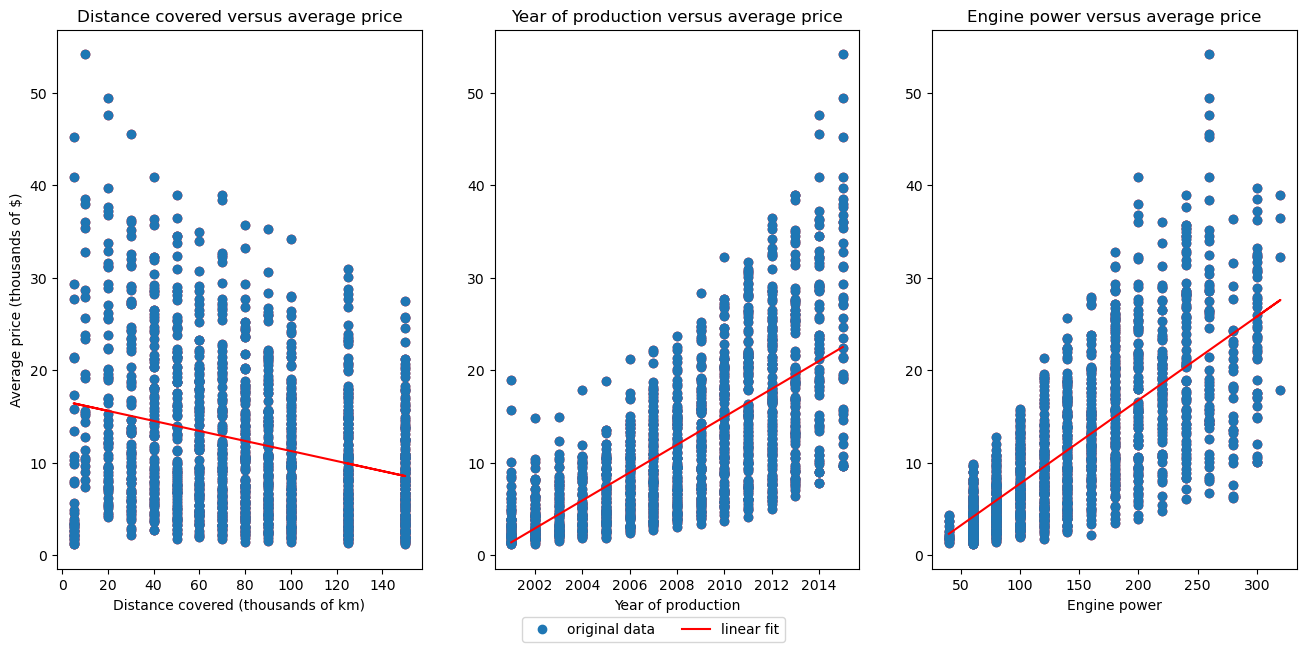

In [117]:
# linear regression with linregress (estimate price from year)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 7))
(ax1, ax2, ax3) = axes # ---> tuple
correlation_coefficients = []
for i in range(3):
    #print(i)
    x,y = car_data[i,:], car_data[3,:]
    x_label = x_labels[i]
    ax = axes[i]
    res = stats.linregress(x,y)
    correlation_coefficients.append(res.rvalue)
    #print(f'for {i}---', 'x before:', x)
    if i == 0:
        x = x/1000
        slope = 1000 * res.slope # ---> for correct rescaling
    else:
        slope = res.slope
    #print('x after:', x)
    ax.scatter(x=x, y=y/1000, marker='o', c='r', edgecolor='r')
    ax.plot(x, y/1000, 'o', label='original data')
    ax.plot(x, (res.intercept + slope*x)/1000, 'r', label='linear fit')
    if i == 0:
        ax.set_xlabel('Distance covered (thousands of km)')
        ax.set_ylabel('Average price (thousands of \$)')
    else:
        ax.set_xlabel(f'{x_label}')
    ax.set_title(f'{x_label} versus average price')
handles, labels = axes[0].get_legend_handles_labels() # ---> to avoid having 3 times the legend
fig.legend(handles,labels,loc='lower center', ncols=2)
plt.show()

In [98]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# your code.....

In [99]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

# your code.....

In [120]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print(correlation_coefficients)
# ---> the closest (in abs value) to 1, the better the fit: so, engine power is best estimator

[np.float64(-0.25728674299884974), np.float64(0.6767043169095446), np.float64(0.7085500315263968)]


In [104]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)


# your code......
